In [16]:
import pandas as pd

df=pd.read_csv("C:/Users/ASUS/Downloads/CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail/non_stationary_sales_data.csv")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1001,101,Widget A,15,01-01-2025,33.88,5000,United States
1,1002,102,Widget B,9,02-01-2025,38.94,5001,United Kingdom
2,1003,103,Widget C,14,03-01-2025,36.55,5002,United States
3,1004,104,Widget D,11,04-01-2025,48.04,5003,United Kingdom
4,1005,105,Widget E,14,05-01-2025,48.05,5004,United States
5,1006,106,Widget F,13,06-01-2025,45.35,5005,United Kingdom
6,1007,107,Widget G,16,07-01-2025,37.27,5006,United States
7,1008,108,Widget H,11,08-01-2025,43.03,5007,United Kingdom
8,1009,109,Widget I,13,09-01-2025,38.70,5008,United States
9,1010,110,Widget J,12,10-01-2025,35.07,5009,United Kingdom


In [17]:
#Removing leading and trailing spaces 
x = df.columns
df.columns = [i.strip() for i in x]  # Update the DataFrame columns directly
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [18]:
#null values

null_values=df[df.isnull().any(axis=1)]
null_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
#check for the column duplicacy
duplicated_row_check=df.columns.duplicated()
if True in duplicated_row_check:
    print(f"Duplicate column found : {df.columns[duplicated_row_check]}")
else:
    print(f"No Duplicate column found")

No Duplicate column found


In [20]:
column_data_types = df.dtypes
column_data_types

InvoiceNo        int64
StockCode        int64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [21]:
#Changing the datatype of the column if inaccurate 

#Step1: Determining the datatype of the column
def determine_type(value):
    value = value.strip()  
    try:
        datetime.strptime(value, "%Y-%m-%d")  # Format: YYYY-MM-DD
        return "Datetime"
    except ValueError:
        pass
    try:
        float(value)
        return "Float"
    except ValueError:
        pass
    
    if value.isdigit():
        return "Number"

    return "Object."



#Step2: To figure out which datatype is present in the column and changing the datatype
def figure_out(df):
    df=df.astype(str)
    for i in df.columns:
        for j in df[i]:
            if determine_type(j)=="Number":
                df[i]=df[i].astype(int)
            elif determine_type(j)=="Datetime":
                df[i]=pd.to_datetime(df[i], errors='coerce')
            elif determine_type(i)=="Float":
                df[i]=df[i].astype(float)
            else:
                df[i]=df[i].astype(object)
    return df


In [22]:
dataframe = pd.DataFrame(df)
duplicates = dataframe[dataframe.duplicated(keep=False)]  # Marks all duplicate rows, including the first occurrence

# Show the duplicate rows
print(duplicates)


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [23]:
def finding_null_values(df):
    # Find rows with at least one null value
    null_rows = df[df.isnull().any(axis=1)]
    
    # Only keep columns that contain null values in the null rows
    null_rows_with_null_columns = null_rows.loc[:, null_rows.isnull().any()]
    
    return null_rows_with_null_columns
null_values = finding_null_values(df)
null_values

""


In [24]:
def trimming_unnecessary_spaces(dataset,column):
    for i in range(len(dataset)):
        dataset[column][i]=dataset[column][i].strip()
trimming_unnecessary_spaces(df,'Description')
trimming_unnecessary_spaces(df,'Country')
df




C:\Users\ASUS\AppData\Local\Temp\ipykernel_25060\3498139386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column][i]=dataset[column][i].strip()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1001,101,Widget A,15,01-01-2025,33.88,5000,United States
1,1002,102,Widget B,9,02-01-2025,38.94,5001,United Kingdom
2,1003,103,Widget C,14,03-01-2025,36.55,5002,United States
3,1004,104,Widget D,11,04-01-2025,48.04,5003,United Kingdom
4,1005,105,Widget E,14,05-01-2025,48.05,5004,United States
5,1006,106,Widget F,13,06-01-2025,45.35,5005,United Kingdom
6,1007,107,Widget G,16,07-01-2025,37.27,5006,United States
7,1008,108,Widget H,11,08-01-2025,43.03,5007,United Kingdom
8,1009,109,Widget I,13,09-01-2025,38.70,5008,United States
9,1010,110,Widget J,12,10-01-2025,35.07,5009,United Kingdom


In [25]:
#fill the null values
def filling_the_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # For object columns
            df[column].fillna('No information', inplace=True)
        elif df[column].dtype=='int' or df[column].dtype=='float':
            df[column] = pd.to_numeric(df[column], errors='coerce')
            
            # Compute rolling mean and fill null values
            rolling_mean = df[column].rolling(window=10, min_periods=1).mean()
            df[column] = df[column].fillna(rolling_mean)


    return df

filling_the_null_values(df)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1001,101,Widget A,15,01-01-2025,33.88,5000,United States
1,1002,102,Widget B,9,02-01-2025,38.94,5001,United Kingdom
2,1003,103,Widget C,14,03-01-2025,36.55,5002,United States
3,1004,104,Widget D,11,04-01-2025,48.04,5003,United Kingdom
4,1005,105,Widget E,14,05-01-2025,48.05,5004,United States
5,1006,106,Widget F,13,06-01-2025,45.35,5005,United Kingdom
6,1007,107,Widget G,16,07-01-2025,37.27,5006,United States
7,1008,108,Widget H,11,08-01-2025,43.03,5007,United Kingdom
8,1009,109,Widget I,13,09-01-2025,38.70,5008,United States
9,1010,110,Widget J,12,10-01-2025,35.07,5009,United Kingdom


In [26]:
df["Sales"]=df["UnitPrice"]*df["Quantity"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,1001,101,Widget A,15,01-01-2025,33.88,5000,United States,508.20
1,1002,102,Widget B,9,02-01-2025,38.94,5001,United Kingdom,350.46
2,1003,103,Widget C,14,03-01-2025,36.55,5002,United States,511.70
3,1004,104,Widget D,11,04-01-2025,48.04,5003,United Kingdom,528.44
4,1005,105,Widget E,14,05-01-2025,48.05,5004,United States,672.70
5,1006,106,Widget F,13,06-01-2025,45.35,5005,United Kingdom,589.55
6,1007,107,Widget G,16,07-01-2025,37.27,5006,United States,596.32
7,1008,108,Widget H,11,08-01-2025,43.03,5007,United Kingdom,473.33
8,1009,109,Widget I,13,09-01-2025,38.70,5008,United States,503.10
9,1010,110,Widget J,12,10-01-2025,35.07,5009,United Kingdom,420.84


In [27]:
furniture_df = df[df['Country'] == 'United Kingdom']
region_subcategory_totals = furniture_df.groupby(['CustomerID', 'StockCode'])['Sales'].sum().reset_index()
region_subcategory_totals

,CustomerID,StockCode,Sales
0,5001,102,350.46
1,5003,104,528.44
2,5005,106,589.55
3,5007,108,473.33
4,5009,110,420.84
5,5011,102,260.34
6,5013,104,406.01
7,5015,106,680.40
8,5017,108,221.31
9,5019,110,451.20


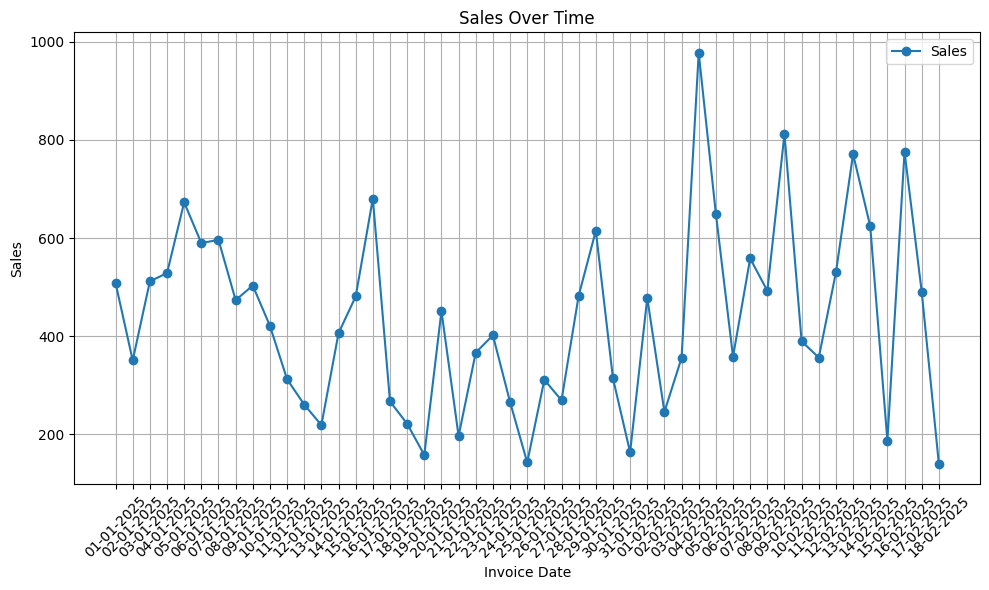

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot( df['InvoiceDate'],df["Sales"], marker='o', label='Sales')
plt.xlabel('Invoice Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [29]:
newdf=df[['InvoiceDate','Sales']]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
newdf

,InvoiceDate,Sales
0,01-01-2025,508.20
1,02-01-2025,350.46
2,03-01-2025,511.70
3,04-01-2025,528.44
4,05-01-2025,672.70
5,06-01-2025,589.55
6,07-01-2025,596.32
7,08-01-2025,473.33
8,09-01-2025,503.10
9,10-01-2025,420.84


In [30]:
result = adfuller(newdf["Sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -5.295283775045139
p-value: 5.600178474765728e-06


In [31]:
if result[1] > 0.05:
    print("Data is non-stationary. Applying differencing...")
    newdf["Sales_diff"] = newdf["Sales"].diff().dropna()
else:
    print("Data is stationary.")


Data is stationary.


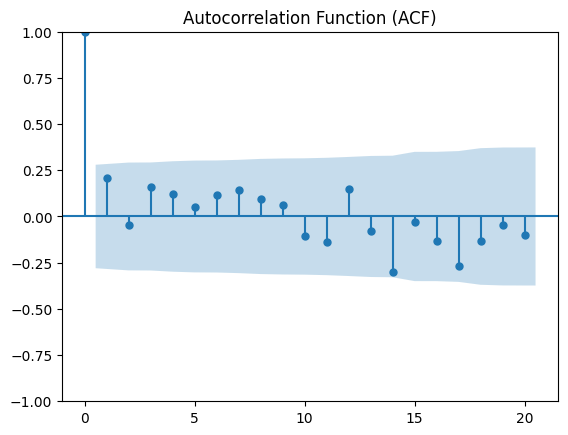

In [32]:
# Step 3: Plot ACF and PACF to determine ARIMA orders
plot_acf(newdf["Sales"].dropna(), lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()


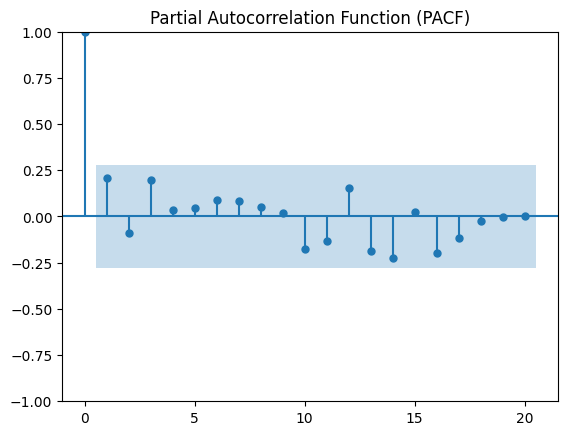

In [33]:
plot_pacf(newdf["Sales"].dropna(), lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [34]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(newdf['Sales'], seasonal=False, trace=True)
print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=665.770, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=745.066, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=677.271, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=712.314, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=665.275, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=663.964, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=701.639, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=675.615, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=659.119, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=656.538, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=657.417, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=658.089, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=657.200, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=660.399, 

In [39]:
# Step 4: Fit the ARIMA Model
# Choose ARIMA(p, d, q) based on ACF/PACF
model = ARIMA(newdf["Sales"], order=(0,0,1))  # Example: (p=1, d=1, q=1)
model_fit = model.fit()


In [40]:
# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   49
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -325.269
Date:                Mon, 20 Jan 2025   AIC                            656.538
Time:                        17:59:22   BIC                            662.213
Sample:                             0   HQIC                           658.691
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.2411     37.700     11.518      0.000     360.351     508.131
ma.L1          0.2831      0.172      1.646      0.100      -0.054       0.620
sigma2      3.409e+04   7019.432      4.856      0.0

In [51]:
# Step 5: Forecast
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

forecast

49    355.937154
50    434.241082
51    434.241082
Name: predicted_mean, dtype: float64

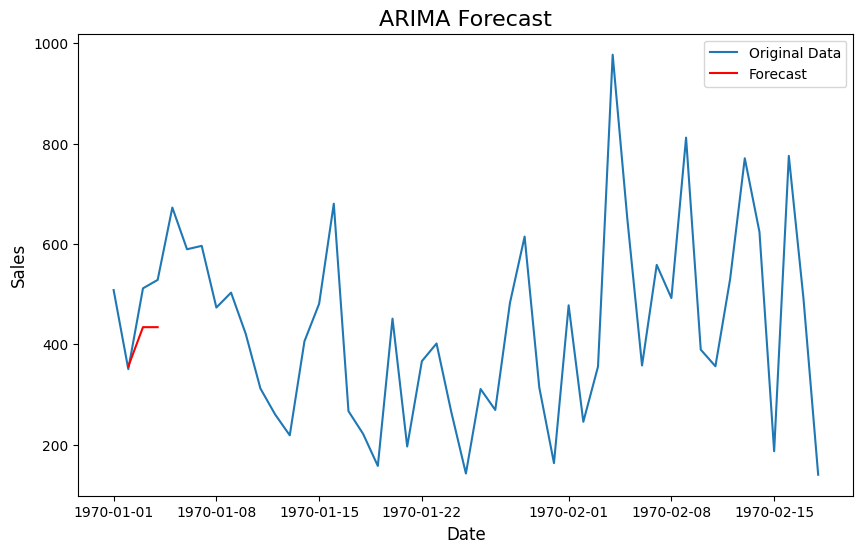

In [52]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(newdf["Sales"], label="Original Data")
plt.plot(pd.date_range(newdf.index[-1], periods=forecast_steps + 1, freq="D")[1:], forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.show()
